<a href="https://colab.research.google.com/github/JonatanLessa/Recurrent-Neural-Networks-and-LSTM/blob/main/btc_rnn_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [386]:
!pip install bitfinex-v2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Carrega um cliente para API da Bitfinex

In [ ]:
key='' # key gerada através da Bitfinex
secret='' # secret gerada através da Bitifinex

In [387]:
from bitfinex import ClientV2

my_client = ClientV2(key=key, secret=secret)

In [388]:
#from pytz import timezone
from datetime import datetime
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

Recebe uma lista de dados para os últimos valores do par BTCUSD

In [389]:
hist = my_client.candles(timeframe='1D', symbol='tBTCUSD', section='hist', limit=10000)

Transformando a lista de dados em Dataframe

In [390]:
data_set = pd.DataFrame(hist)

data_set

,0,1,2,3,4,5
0,1656028800000,21076.000000,21089.906665,21172.00000,20944.00000,214.132628
1,1655942400000,19952.000000,21074.000000,21179.00000,19855.00000,6144.686931
2,1655856000000,20689.232053,19944.000000,20848.00000,19730.00000,7258.553527
3,1655769600000,20554.000000,20694.000000,21675.00000,20327.00000,8182.101222
4,1655683200000,20543.455664,20549.097986,21039.00000,19626.00000,6689.144788
...,...,...,...,...,...,...
3361,1365033600000,134.716560,132.899000,143.00000,119.00000,6981.668305
3362,1364947200000,117.958261,134.700000,146.88000,101.51088,12996.245072
3363,1364860800000,104.000000,118.229354,118.38670,99.00000,8376.527478
3364,1364774400000,93.250000,103.999000,105.90000,92.49999,5224.401313


Trata colunas

In [391]:
data_set = pd.DataFrame(hist, columns = ['Data', 'Abertura', 'Fechamento', 'Máxima', 'Mínima',  'Volume']) # Nomeia colunas
data_set = data_set.drop(['Abertura', 'Volume'], axis=1) # Excui as colunas Abertura e Volume
data_set = data_set.rename(columns={'Fechamento': 'Preço'}) # Renomeia a coluna Fechamento por Preço
data_set

,Data,Preço,Máxima,Mínima
0,1656028800000,21089.906665,21172.00000,20944.00000
1,1655942400000,21074.000000,21179.00000,19855.00000
2,1655856000000,19944.000000,20848.00000,19730.00000
3,1655769600000,20694.000000,21675.00000,20327.00000
4,1655683200000,20549.097986,21039.00000,19626.00000
...,...,...,...,...
3361,1365033600000,132.899000,143.00000,119.00000
3362,1364947200000,134.700000,146.88000,101.51088
3363,1364860800000,118.229354,118.38670,99.00000
3364,1364774400000,103.999000,105.90000,92.49999


In [ ]:
#data_set = data_set[['Data', 'Preço', 'Máxima', 'Mínima']]

Formata casas decimais nas colunas de valores

In [392]:
data_set['Preço'] = data_set['Preço'].apply(lambda x: '{:.1f}'.format(x))
data_set['Máxima'] = data_set['Máxima'].apply(lambda x: '{:.1f}'.format(x))
data_set['Mínima'] = data_set['Mínima'].apply(lambda x: '{:.1f}'.format(x))

In [393]:
data_set

,Data,Preço,Máxima,Mínima
0,1656028800000,21089.9,21172.0,20944.0
1,1655942400000,21074.0,21179.0,19855.0
2,1655856000000,19944.0,20848.0,19730.0
3,1655769600000,20694.0,21675.0,20327.0
4,1655683200000,20549.1,21039.0,19626.0
...,...,...,...,...
3361,1365033600000,132.9,143.0,119.0
3362,1364947200000,134.7,146.9,101.5
3363,1364860800000,118.2,118.4,99.0
3364,1364774400000,104.0,105.9,92.5


Copia o data_set

In [394]:
dataset = data_set.copy()

Cria datas data a partir de um timestamp

In [395]:
dataset['Data'] = pd.to_datetime(dataset['Data'], unit='ms')

In [ ]:
#dataset['Preço'] = dataset['Preço'].apply(lambda x: x[:-7])
#dataset['Máxima'] = dataset['Máxima'].apply(lambda x: x[:-7])
#dataset['Mínima'] = dataset['Mínima'].apply(lambda x: x[:-7])

Carrega dados do Fear & Greed Index

In [396]:
fear = pd.read_csv('fear_and_greed_index2.csv')
fear

,date,fng_value,fng_classification
0,20-06-2022,9,Extreme Fear
1,19-06-2022,6,Extreme Fear
2,18-06-2022,6,Extreme Fear
3,17-06-2022,9,Extreme Fear
4,16-06-2022,7,Extreme Fear
...,...,...,...
1596,05-02-2018,11,Extreme Fear
1597,04-02-2018,24,Extreme Fear
1598,03-02-2018,40,Fear
1599,02-02-2018,15,Extreme Fear


Atribui uma nova coluna com os valores do Fear & Greed Index ao dataset

In [397]:
dataset['Fear'] = fear['fng_value']

Média de 8

In [ ]:
#dataset['MA8'] = dataset['Preço'].rolling(8).mean()

In [398]:
dataset

,Data,Preço,Máxima,Mínima,Fear
0,2022-06-24,21089.9,21172.0,20944.0,9.0
1,2022-06-23,21074.0,21179.0,19855.0,6.0
2,2022-06-22,19944.0,20848.0,19730.0,6.0
3,2022-06-21,20694.0,21675.0,20327.0,9.0
4,2022-06-20,20549.1,21039.0,19626.0,7.0
...,...,...,...,...,...
3361,2013-04-04,132.9,143.0,119.0,NaN
3362,2013-04-03,134.7,146.9,101.5,NaN
3363,2013-04-02,118.2,118.4,99.0,NaN
3364,2013-04-01,104.0,105.9,92.5,NaN


Reduz o dataset para o tamaho do Fear & Greed Index

In [399]:
new_data = dataset.iloc[:1601,:]

Reordena por data

In [400]:
new_data = new_data.sort_values(by='Data')

Muda o formato da data

In [401]:
new_data['Data'] = pd.to_datetime(new_data['Data']).dt.strftime('%d.%m.%Y')

In [402]:
new_data

,Data,Preço,Máxima,Mínima,Fear
1600,05.02.2018,6946.6,8380.0,6651.0,30.0
1599,06.02.2018,7678.8,7880.0,6000.0,15.0
1598,07.02.2018,7586.9,8488.9,7175.1,40.0
1597,08.02.2018,8239.7,8648.9,7565.0,24.0
1596,09.02.2018,8678.1,8750.0,7724.9,11.0
...,...,...,...,...,...
4,20.06.2022,20549.1,21039.0,19626.0,7.0
3,21.06.2022,20694.0,21675.0,20327.0,9.0
2,22.06.2022,19944.0,20848.0,19730.0,6.0
1,23.06.2022,21074.0,21179.0,19855.0,6.0


Cria um cabeçalho para gravação dos dados

In [403]:
header = ['Data', 'Preço', 'Máxima', 'Mínima', 'Fear']

Grava os dados no formato csv

In [405]:
new_data.to_csv("BTCUSD_Bitfinex.csv", columns=header, index=False)

In [406]:
new_data_train = new_data.iloc[:1201,:]

In [407]:
new_data_train.to_csv("BTCUSD_train2.csv", columns=header, index=False)

In [408]:
new_data_test = new_data.iloc[1201:,:]

In [409]:
new_data_test.to_csv("BTCUSD_test2.csv", columns=header, index=False)

In [410]:
data_training = pd.read_csv('BTCUSD_train2.csv')

In [411]:
data_training

,Data,Preço,Máxima,Mínima,Fear
0,05.02.2018,6946.6,8380.0,6651.0,30.0
1,06.02.2018,7678.8,7880.0,6000.0,15.0
2,07.02.2018,7586.9,8488.9,7175.1,40.0
3,08.02.2018,8239.7,8648.9,7565.0,24.0
4,09.02.2018,8678.1,8750.0,7724.9,11.0
...,...,...,...,...,...
1196,16.05.2021,46597.0,49870.0,44021.0,68.0
1197,17.05.2021,43534.0,46796.0,42128.0,31.0
1198,18.05.2021,42900.0,45800.0,42316.0,26.0
1199,19.05.2021,36733.0,43600.0,29563.0,27.0


In [412]:
training_data = data_training.drop(['Data'], axis = 1)

Normaliza dados

In [413]:
scaler = MinMaxScaler(feature_range = (0, 1)) # Usado para todos os dados que serão normalizados, dados de treino e dados de teste

In [414]:
training_data_N = scaler.fit_transform(training_data)


In [415]:
training_data_N

array([[0.06082287, 0.08220171, 0.05844708, 0.27777778],
       [0.07297449, 0.07407227, 0.04737279, 0.11111111],
       [0.07144932, 0.08397231, 0.06736265, 0.38888889],
       ...,
       [0.65750731, 0.69060951, 0.66515154, 0.23333333],
       [0.55515946, 0.65483995, 0.4482077 , 0.24444444],
       [0.61869744, 0.63370339, 0.54044243, 0.16666667]])

Guarda os dados esperados

In [416]:
guard_data = training_data.columns.get_loc('Preço')
Y_train = training_data_N[:, guard_data : guard_data + 1] # guarda os dados esperados em memória
Y_train = Y_train[60 : , :] # Ignora os 60 primeiros dados

X_train = dados_treino, Y_train = dados_esperados


In [417]:
Y_train

array([[0.05523663],
       [0.05992668],
       [0.06210574],
       ...,
       [0.65750731],
       [0.55515946],
       [0.61869744]])

Agrupa os dados dos últimos 60 dias(histórico) antes de retornar os dados de treino e dados esperados para dar entrada na rede. Ao prever o valor de 1 dia a rede se baseia nos preços, máximas, mínimas e fear dos últimos 2 meses. 

In [418]:
X_train = []
for i in range(60, len(training_data_N)):
  X_train.append(training_data_N[i - 60: i, :])

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [419]:
Y_train

array([[0.05523663],
       [0.05992668],
       [0.06210574],
       ...,
       [0.65750731],
       [0.55515946],
       [0.61869744]])

In [420]:
X_train.shape

(1141, 60, 4)

Cria o modelo usando o framework keras

In [421]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [422]:
model = Sequential() # inicializa a rede neural
model.add(LSTM(units=100, return_sequences=True, input_shape=(60, X_train.shape[2]))) # input_shape são as dimensões dos dados a serem treinados (60, 4)
model.add(Dropout(0.3)) # Dropout evita overfitting, 30% dos neurônios são ignorados
model.add(LSTM(units=50, return_sequences=True)) # return_sequences=True empilha as camadas de LTSM, fazendo com que a camada seguinte seja alimentada pela anterior
model.add(Dropout(0.3))

model.add(LSTM(units=50))
model.add(Dropout(0.3))
model.add(Dense(units=1)) # Dense centraliza as saídas numa só

model.compile(optimizer='adam', loss='mean_squared_error')

# callbacks do keras
es = EarlyStopping(monitor='loss', min_delta=1e-10, patience=10, verbose=1) # interrompe o treinamento caso a função loss não diminua depois de determinadas épocas
rlr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=5, verbose=1) # reduz o LearningRate
mcp = ModelCheckpoint(filepath = 'pesos.h5', monitor='loss', save_best_only = True, verbose=1) # salva os melhores pesos da rede

# Treina o modelo
model.fit(X_train, Y_train, batch_size=32, callbacks=[es, rlr, mcp], epochs=20,  validation_split=0.1)


Epoch 1/20
33/33 [==============================] - ETA: 0s - loss: 0.0061
Epoch 1: loss improved from inf to 0.00608, saving model to pesos.h5
33/33 [==============================] - 12s 154ms/step - loss: 0.0061 - val_loss: 0.0093 - lr: 0.0010
Epoch 2/20
33/33 [==============================] - ETA: 0s - loss: 7.8474e-04
Epoch 2: loss improved from 0.00608 to 0.00078, saving model to pesos.h5
33/33 [==============================] - 4s 114ms/step - loss: 7.8474e-04 - val_loss: 0.0094 - lr: 0.0010
Epoch 3/20
33/33 [==============================] - ETA: 0s - loss: 9.9030e-04
Epoch 3: loss did not improve from 0.00078
33/33 [==============================] - 4s 118ms/step - loss: 9.9030e-04 - val_loss: 0.0266 - lr: 0.0010
Epoch 4/20
33/33 [==============================] - ETA: 0s - loss: 7.7649e-04
Epoch 4: loss improved from 0.00078 to 0.00078, saving model to pesos.h5
33/33 [==============================] - 4s 109ms/step - loss: 7.7649e-04 - val_loss: 0.0075 - lr: 0.0010
Epoch 5/2

In [423]:
data_test = pd.read_csv('BTCUSD_test2.csv')

In [424]:
data_test

,Data,Preço,Máxima,Mínima,Fear
0,21.05.2021,37391.4,42298.1,33552.0,27.0
1,22.05.2021,37557.0,38956.0,35372.0,21.0
2,23.05.2021,34747.0,38384.0,31230.0,23.0
3,24.05.2021,38845.0,39966.0,34500.0,11.0
4,25.05.2021,38396.8,39829.4,36455.0,19.0
...,...,...,...,...,...
395,20.06.2022,20549.1,21039.0,19626.0,7.0
396,21.06.2022,20694.0,21675.0,20327.0,9.0
397,22.06.2022,19944.0,20848.0,19730.0,6.0
398,23.06.2022,21074.0,21179.0,19855.0,6.0


In [425]:
test_data = data_test.drop(['Data'], axis = 1)

In [426]:
test_data_N = scaler.fit_transform(test_data)

Normaliza os dados de teste utilizando o mesmo normalizador de treinamento

In [427]:
test_data_N

array([[0.37944853, 0.44769215, 0.32731266, 0.26923077],
       [0.38285867, 0.37845453, 0.36466821, 0.19230769],
       [0.32499331, 0.36660452, 0.27965354, 0.21794872],
       ...,
       [0.02016021, 0.00331469, 0.04361569, 0.        ],
       [0.04342991, 0.01017195, 0.04618132, 0.        ],
       [0.04375734, 0.01002693, 0.06853308, 0.03846154]])

In [428]:
guard_data2 = test_data.columns.get_loc('Preço')
Y_test = test_data_N[:, guard_data2 : guard_data2 + 1]
Y_test = Y_test[60 : , :]

In [ ]:
Y_test

X_test = dados_teste


In [430]:
X_test = []
for i in range(60, len(test_data_N)):
  X_test.append(test_data_N[i - 60: i, :])

X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [431]:
from datetime import datetime

In [432]:
col_pos = data_test.columns.get_loc('Data')
datas = data_test.iloc[:, col_pos : col_pos + 1].values
lista_data = []
for i in range(0, len(datas)):
        data = datas[i, 0]
        partes = data.split('.')

        dia = partes[0]
        #ajusta os valores quando necessário(com 0 à esq.)
        if(len(dia) == 1):
            dia = '0' + dia
        mes = partes[1]
        if(len(mes) == 1):
            mes ='0' + mes
      
        data_completa = dia + '/' + mes + '/' + partes[2]
        #converte a string em objeto data
        data = datetime.strptime(data_completa, '%d/%m/%Y')
        lista_data.append(data)
datas = lista_data[60 : len(lista_data)]

In [433]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates

In [434]:
model_save = 'pesos.h5'


Recria o modelo através de seus pesos salvos carregando os dados de teste

In [435]:
if isinstance(model_save, str):  
  model2 = Sequential()
  model2.add(LSTM(units=100, return_sequences=True, input_shape=(60, X_test.shape[2])))
  model2.add(Dropout(0.3))
  model2.add(LSTM(units=50, return_sequences=True))
  model2.add(Dropout(0.3))

  model2.add(LSTM(units=50))
  model2.add(Dropout(0.3))
  model2.add(Dense(units=1))

  model2.compile(optimizer='adam', loss='mean_squared_error')

  temp = model2
  temp.load_weights(model_save)
  model_save = temp

Formata os dados de teste com da mesma forma que os dados de treinamento

In [436]:
dados = test_data

scaler = MinMaxScaler(feature_range=(0,1))
test_data_N2 = scaler.fit_transform(dados)

guard_data3 = test_data.columns.get_loc('Preço')
Y_test2 = test_data_N2[:, guard_data3 : guard_data3 + 1]
Y_test2 = Y_test2[60 : , :]

X_test2 = []
for i in range(60, len(test_data_N2)):
  X_test2.append(test_data_N2[i - 60: i, :])

X_test2 = np.array(X_test2)
Y_test2 = np.array(Y_test2)

dados_teste, dados_esperados = X_test2, Y_test2

previstos = model_save.predict(dados_teste)

dados = np.array(dados)

precos_reais = []

for i in range(60, len(dados)):
  precos_reais.append(dados[i,0])
  dados[i, 0] = previstos[i - 60]

dados = dados[60 : len(dados), :]

In [437]:
dados_transformados = scaler.inverse_transform(dados)

Plota o gráfico

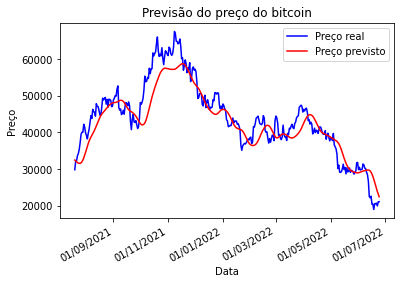

In [438]:
precos_previstos = dados_transformados[:, 0]
fig, ax = plt.subplots()
ax.plot(datas, precos_reais, color='blue', label='Preço real')
ax.plot(datas, precos_previstos, color='red', label='Preço previsto')

#formata data
myFmt = dates.DateFormatter("%d/%m/%Y")
ax.xaxis.set_major_formatter(myFmt)
plt.gcf().autofmt_xdate()
plt.title('Previsão do preço do bitcoin')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.show()